In [4]:
import numpy as np

x = np.array([1, 2, 3])
print(x)
print(np.diag(x))

M = np.random.normal(0, 1, (2, 3))
N = np.random.normal(0, 1, (3, 4))
print(np.matmul(M, N).round(3)) # (2 x 4)
print((M @ N).round(3))


[1 2 3]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[-1.7   -1.383 -2.201  0.786]
 [ 1.317 -1.1   -0.061 -0.663]]
[[-1.7   -1.383 -2.201  0.786]
 [ 1.317 -1.1   -0.061 -0.663]]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(0)
plt.style.use('seaborn')

# set params
N, n_feature = 300, 5
lr = 0.03 
epochs = 30
b_size = 32 # batch size
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, 1))

W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

n_batch = N // b_size 

# generate dataset
x_data = np.random.randn(N, n_feature) # 이미 Transpose 되어 있는 상태 
y_data = x_data @ t_W + t_b # (32 x 1)

J_track = list()
W_track, b_track = list(), list()

for epoch in range(epochs):
    for b_idx in range(n_batch):
        W_track.append(W)
        b_track.append(b)
        
        # get minibatch
        X = x_data[b_idx * b_size  : (b_idx + 1) * b_size, ...]
        Y = y_data[b_idx * b_size  : (b_idx + 1) * b_size, ...]
        
        # forward propagation
        Pred = X @ W + b
        J0 = (Y - Pred)**2
        J = np.mean(J0)
        J_track.append(J)
        
        # jacobians
        dJ_dJ0 = 1 / b_size * np.ones((1, b_size))
        dJ0_dPred = np.diag(-2 * (Y - Pred).flatten())
        dPred_dW = X 
        dPread_dB = np.ones((b_size, 1))
        
        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred
        dJ_dW = dJ_dPred @ dPred_dW
        dJ_db = dJ_dPred @ dPread_dB
        
        # parameter update
        W = W - lr * dJ_dW.T
        b = b - lr * dJ_db
        




/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_7340/3888947589.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_7340/3076231105.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', n_feature)


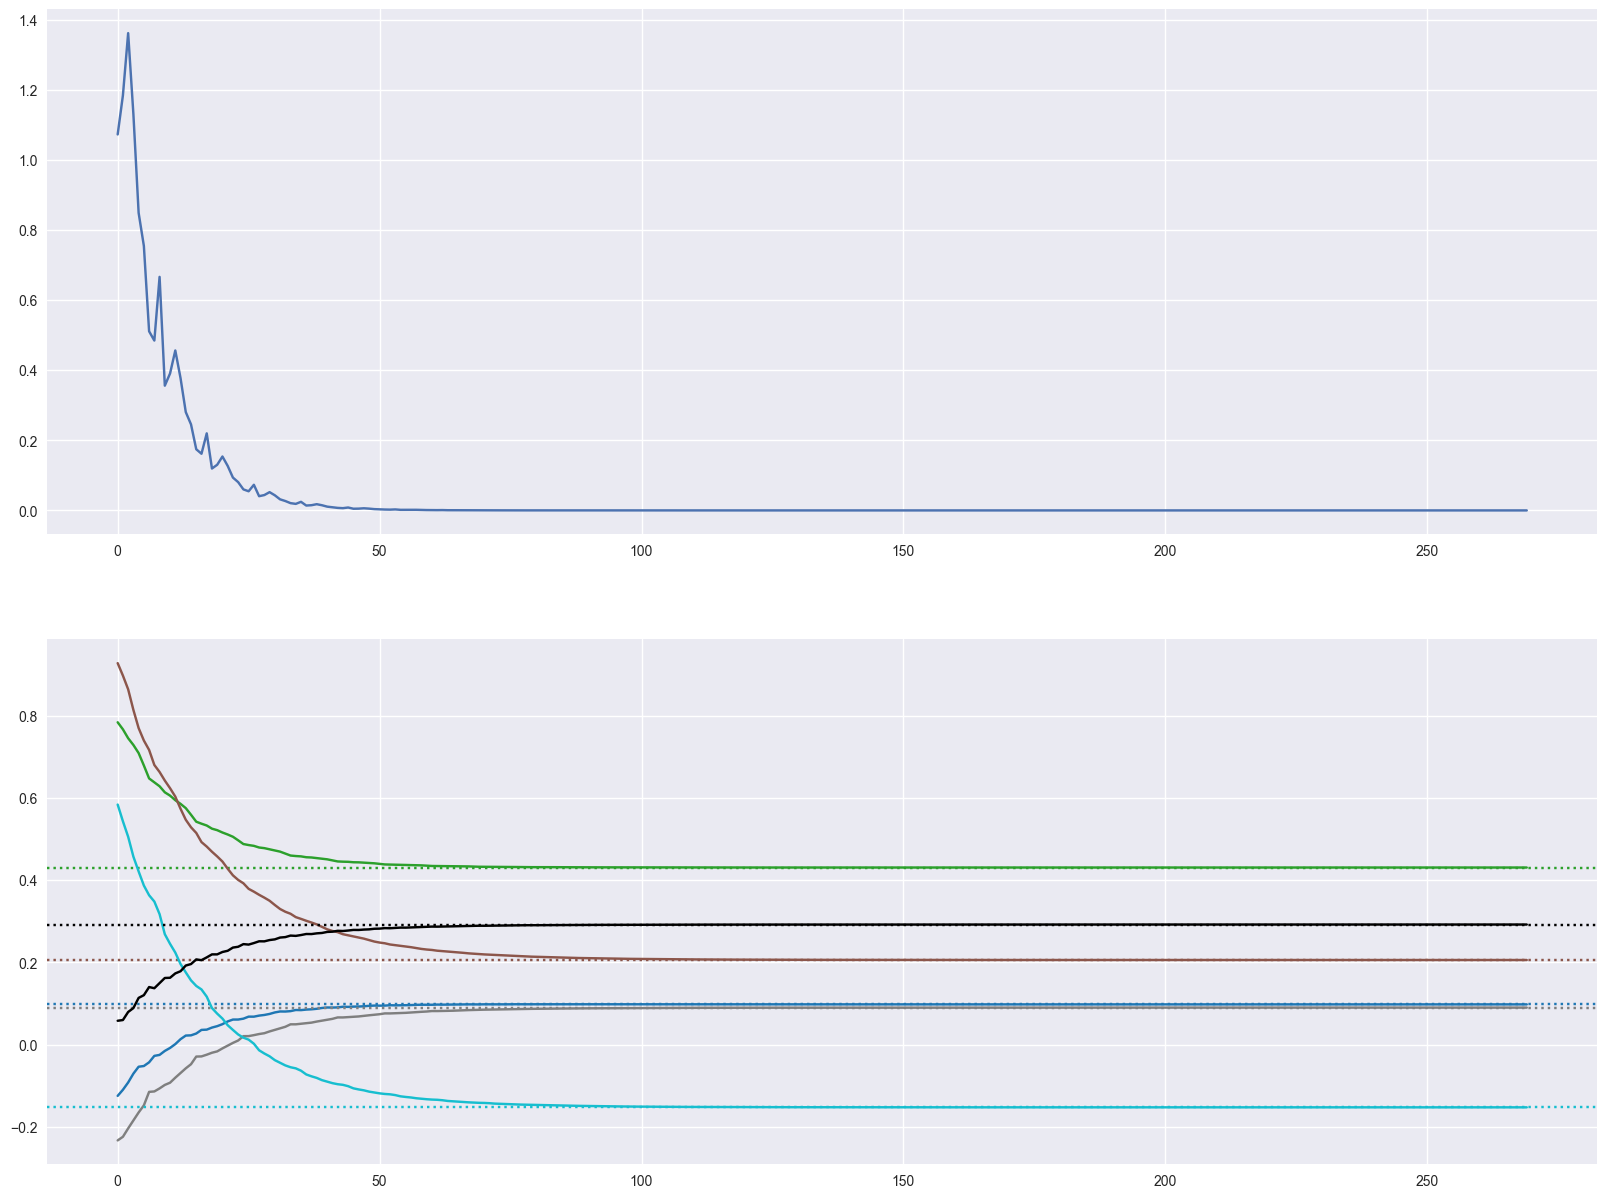

In [20]:
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)

cmap = cm.get_cmap('tab10', n_feature)
fig, axes = plt.subplots(2, 1, figsize = (20, 15))
axes[0].plot(J_track)

for w_idx, (t_w, w_track) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y = t_w, linestyle=':', color = cmap(w_idx))
    axes[1].plot(w_track, color = cmap(w_idx))
axes[1].axhline(y = t_b, linestyle = ':', color='black')
axes[1].plot(b_track, color = 'black')
    
